In [1]:
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""codificar"""
from sklearn.preprocessing import StandardScaler
"""mezclar y dividir datos"""
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
"""caracteristicas"""
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

# Importacion de datos

In [12]:
df_traffic = pd.read_csv('../../araData/Z/Categorizado.csv', low_memory=False)

In [13]:
df_botnet = pd.read_csv('../../araData/Z/BotnetCategorizado.csv', low_memory=False)

In [3]:
df_traffic.Label.value_counts()

2    94285
0    41300
3    41061
1    34285
Name: Label, dtype: int64

# GRAFICAS

In [2]:
df_traffic = pd.read_csv('../../araData/Z/5Clases_noCatLabel.csv', low_memory=False)

In [3]:
"""sumar clases"""
cantidad = df_traffic['Label'].value_counts().rename_axis('Trafico').reset_index(name='Flujos')

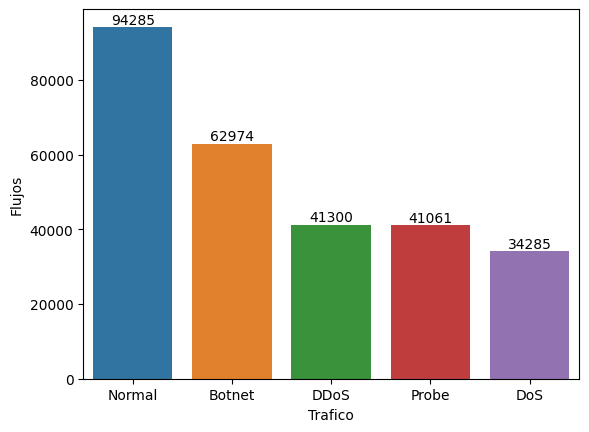

In [4]:
ax = sns.barplot(x='Trafico', y='Flujos', data=cantidad)
ax.bar_label(ax.containers[0])
plt.savefig('CantidadTraficoSinCategorizar_sinBalanceo.png')

In [5]:
df_traffic = pd.read_csv('../../araData/Z/balance_total5Clases_34200_LNC.csv', low_memory=False)
cantidad = df_traffic['Label'].value_counts().rename_axis('Trafico').reset_index(name='Flujos')

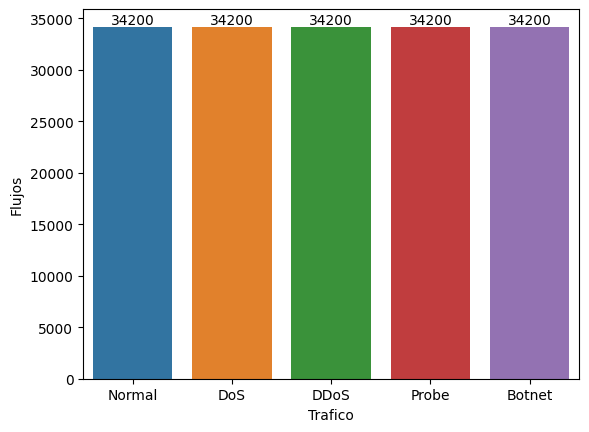

In [6]:
ax = sns.barplot(x='Trafico', y='Flujos', data=cantidad)
ax.bar_label(ax.containers[0])
plt.savefig('CantidadTraficoBalanceo.png')

**Concatenando Botnet categorizado y las 4 clases de InSDN**

In [14]:
df_traffic=df_traffic.reset_index(drop=True)
df_botnet=df_botnet.reset_index(drop=True)
df_traffic = pd.concat([df_botnet, df_traffic], axis=0)

In [15]:
df_traffic.Label.value_counts()

2    94285
4    62974
0    41300
3    41061
1    34285
Name: Label, dtype: int64

In [16]:
df_traffic.Label.replace({4:'Botnet', 2:'Normal', 0:'DDoS', 1:'DoS', 3:'Probe'},inplace=True )

In [18]:
df_traffic.Label.value_counts()

Normal    94285
Botnet    62974
DDoS      41300
Probe     41061
DoS       34285
Name: Label, dtype: int64

In [17]:
"""aqui guardo todas las 5 clases """
df_traffic.to_csv('../../araData/Z/5Clases_noCatLabel.csv',index=False)

## Seleccion y balanceo de datos

## **Normal**

In [4]:
df_normal=df_traffic[(df_traffic.Label==2)]
df_normal.protoTcp.value_counts()

0    52333
1    41952
Name: protoTcp, dtype: int64

In [5]:
df_normal.describe()

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
count,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,...,94285.000000,94285.000000,9.428500e+04,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.000000,94285.0
mean,0.444949,0.555051,0.934974,0.064984,0.000042,3.741888,3.720147,3.639458,45.399565,20.979817,...,0.007680,0.000025,1.415331e+06,157.845786,388.440209,619.341539,1399.190073,69.676046,207.113242,2.0
std,0.496963,0.496963,0.246573,0.246499,0.006513,6.358330,6.347501,6.308889,398.449651,195.749723,...,0.066397,0.000188,1.212455e+06,240.987666,743.183693,1564.047625,6191.842239,18.061732,159.742382,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.280000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.003318,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,4.177040e+05,74.000000,125.414635,75.000000,186.000000,54.000000,60.000000,2.0
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.006773,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,1.021772e+06,77.000000,266.000000,82.000000,337.000000,72.000000,158.000000,2.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5.581334,5.527219,5.365351,12.000000,6.000000,...,0.003950,0.000028,2.254904e+06,102.000000,387.000000,271.000000,448.000000,76.000000,364.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,19.999998,19.999998,19.999998,41714.000000,20273.000000,...,7.028434,0.005490,4.486512e+06,4577.167480,47301.550781,63778.000000,65226.000000,1048.000000,1739.000000,2.0


duracion = 0

In [6]:
df_normal[(df_normal.SrcDur==0)]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
25,0,1,1,0,0,0.003818,0.0,0.0,2,1,...,0.0,0.0,7740,75.0,453.0,75.0,453.0,75.0,453.0,2
27,0,1,1,0,0,0.005074,0.0,0.0,2,1,...,0.0,0.0,8200,75.0,385.0,75.0,385.0,75.0,385.0,2
43,0,1,1,0,0,0.002823,0.0,0.0,2,1,...,0.0,0.0,12836,92.0,392.0,92.0,392.0,92.0,392.0,2
44,0,1,1,0,0,0.002851,0.0,0.0,2,1,...,0.0,0.0,12968,92.0,404.0,92.0,404.0,92.0,404.0,2
68,0,1,1,0,0,0.005717,0.0,0.0,2,1,...,0.0,0.0,20140,75.0,453.0,75.0,453.0,75.0,453.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94211,0,1,1,0,0,0.003458,0.0,0.0,2,1,...,0.0,0.0,891844,72.0,186.0,72.0,186.0,72.0,186.0,2
94212,0,1,1,0,0,0.003395,0.0,0.0,2,1,...,0.0,0.0,891972,76.0,480.0,76.0,480.0,76.0,480.0,2
94213,0,1,1,0,0,0.030794,0.0,0.0,2,1,...,0.0,0.0,892104,76.0,217.0,76.0,217.0,76.0,217.0,2
94217,1,0,0,1,0,0.000299,0.0,0.0,2,1,...,0.0,0.0,1144,60.0,90.0,60.0,90.0,60.0,90.0,2


duracion mayor a 5 secs

In [5]:
normal_1=df_normal[(df_normal.SrcDur>=1)]
normal_1

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
0,1,0,1,0,0,11.450987,11.449797,11.449333,786,194,...,0.0,0.0,128,66.773193,3328.307373,1348.0,45927.0,54.0,60.0,2
1,1,0,1,0,0,12.774145,12.774145,12.772697,8,4,...,0.0,0.0,468,54.000000,60.000000,54.0,60.0,54.0,60.0,2
2,1,0,1,0,0,11.265332,11.263568,10.240026,5,3,...,0.0,0.0,768,54.000000,60.000000,54.0,60.0,54.0,60.0,2
3,1,0,1,0,0,11.261298,11.259567,10.239794,5,3,...,0.0,0.0,1068,54.000000,60.000000,54.0,60.0,54.0,60.0,2
4,1,0,1,0,0,11.261163,11.259556,10.239808,5,3,...,0.0,0.0,1368,54.000000,60.000000,54.0,60.0,54.0,60.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94280,1,0,0,1,0,19.554995,19.512526,19.554995,79,28,...,0.0,0.0,24196,1034.000000,124.627449,6178.0,243.0,66.0,66.0,2
94281,1,0,0,1,0,19.867643,19.867643,19.818781,1847,1011,...,0.0,0.0,24524,327.851624,357.937805,6178.0,1620.0,66.0,66.0,2
94282,1,0,0,1,0,18.200975,18.200474,18.200624,84,30,...,0.0,0.0,24884,969.466675,114.814812,4410.0,243.0,66.0,66.0,2
94283,1,0,0,1,0,16.801098,16.800465,16.801098,69,24,...,0.0,0.0,25212,914.000000,122.444443,5858.0,243.0,66.0,66.0,2


In [6]:
normal_1[(normal_1.SrcDur>=1)].protoTcp.value_counts()

1    28306
0     1025
Name: protoTcp, dtype: int64

In [7]:
"""agrego 29331 instancias para 34200"""
balance_normal = df_normal[(df_normal.SrcDur>=1)]

In [10]:
"""selecciono nuevas instancias"""
normal_2 = df_normal[(df_normal.SrcDur>=0.009356) & (df_normal.SrcDur<1)]

In [11]:
normal_2.protoTcp.value_counts()

1    9358
0     431
Name: protoTcp, dtype: int64

In [12]:
normal_2 = shuffle(normal_2)
normal_2.reset_index(inplace=True)
normal_2.drop('index', axis='columns',inplace=True)
normal_2 = normal_2.loc[0:4868]

In [13]:
normal_2.protoTcp.value_counts()

1    4667
0     202
Name: protoTcp, dtype: int64

In [14]:
balance_normal = pd.concat([balance_normal,normal_2], axis=0)

In [15]:
balance_normal.shape

(34200, 40)

**Guardar**

In [16]:
balance_normal.to_csv('../../araData/Z/balance_Normal_34200.csv',index=False)

## **DoS**

In [4]:
"""selecciono clase DoS"""
df_dos = df_traffic[(df_traffic.Label == 1)]
df_dos

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
94285,1,0,1,0,0,0.040778,0.040770,0.040750,12,6,...,0.000028,0.004070,128,96.500000,377.000000,241.0,1514.0,66.0,66.0,1
94286,1,0,1,0,0,10.036650,10.036640,10.036617,7,4,...,0.000033,0.004034,456,124.000000,68.666664,239.0,74.0,66.0,66.0,1
94287,1,0,1,0,0,10.017091,10.017084,10.017078,7,4,...,0.000013,0.002296,764,116.250000,68.666664,239.0,74.0,66.0,66.0,1
94288,1,0,1,0,0,9.996828,9.996825,9.996814,7,4,...,0.000014,0.007719,1072,121.250000,68.666664,239.0,74.0,66.0,66.0,1
94289,1,0,1,0,0,19.990257,19.990255,19.990238,9,5,...,0.000020,0.004208,1380,114.400002,68.000000,239.0,74.0,66.0,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128565,1,0,0,1,0,19.113325,19.112623,19.112768,80,28,...,0.000000,0.000000,2588,1052.000000,125.192307,6178.0,243.0,66.0,66.0,1
128566,1,0,0,1,0,19.999716,19.090900,19.999716,80,27,...,0.000000,0.000000,2936,1069.851807,123.773582,6178.0,243.0,66.0,66.0,1
128567,1,0,0,1,0,8.413760,8.413160,8.413118,36,12,...,0.000000,0.000000,3264,1195.333374,120.916664,6178.0,243.0,66.0,66.0,1
128568,1,0,0,1,0,8.393086,8.393086,8.392476,34,12,...,0.000000,0.000000,3592,1195.333374,122.636360,6178.0,243.0,66.0,66.0,1


In [5]:
df_dos.protoTcp.value_counts()

1    34178
0      107
Name: protoTcp, dtype: int64

In [12]:
"""selecciono trafico udp"""
dos_1 = df_dos[(df_dos.protoUdp==1)]
dos_1.shape

(107, 40)

In [20]:
"""selecciono trafico tcp"""
dos_2 = df_dos[(df_dos.protoUdp==0)]

In [23]:
"""mezclar datos y seleccionar"""
dos_2 = shuffle(dos_2)
dos_2.reset_index(inplace=True)
dos_2.drop('index', axis='columns',inplace=True)
dos_2 = dos_2.loc[0:34092]

In [24]:
"""concatenar datos tcp y udp"""
balance_dos = pd.concat([dos_1,dos_2], axis=0)
balance_dos.shape

(34200, 40)

In [25]:
balance_dos.protoTcp.value_counts()

1    34093
0      107
Name: protoTcp, dtype: int64

**Guardar**

In [26]:
balance_dos.to_csv('../../araData/Z/balance_DoS_34200.csv',index=False)

## **DDoS**

In [3]:
"""seleccionar clase DDoS"""
df_ddos = df_traffic[(df_traffic.Label == 0)]
df_ddos

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
169631,1,0,0,1,0,19.999178,19.997679,19.998796,42189,20861,...,0.0,0.0,128,170.038300,161.609848,51070.0,50746.0,66.0,66.0,0
169632,1,0,0,1,0,18.599634,18.598671,18.599367,79,28,...,0.0,0.0,488,1034.000000,124.627449,6178.0,243.0,66.0,66.0,0
169633,1,0,0,1,0,18.600424,18.599756,18.599895,87,31,...,0.0,0.0,816,940.322571,119.392860,5858.0,243.0,66.0,66.0,0
169634,1,0,0,1,0,18.535315,18.535309,18.534498,12086,6252,...,0.0,0.0,1552,170.673386,173.141922,6178.0,1620.0,66.0,66.0,0
169635,1,0,0,1,0,19.448097,19.447540,19.447605,83,29,...,0.0,0.0,1912,1000.620667,121.370369,5858.0,243.0,66.0,66.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210926,0,1,1,0,0,0.000000,0.000000,0.000000,1,1,...,0.0,0.0,76635376,42.000000,0.000000,42.0,0.0,42.0,0.0,0
210927,0,1,1,0,0,0.000000,0.000000,0.000000,1,1,...,0.0,0.0,144775272,42.000000,0.000000,42.0,0.0,42.0,0.0,0
210928,0,1,1,0,0,0.000000,0.000000,0.000000,1,1,...,0.0,0.0,220812784,42.000000,0.000000,42.0,0.0,42.0,0.0,0
210929,0,1,1,0,0,0.000000,0.000000,0.000000,1,1,...,0.0,0.0,242456864,42.000000,0.000000,42.0,0.0,42.0,0.0,0


In [4]:
df_ddos.protoTcp.value_counts()

1    20664
0    20636
Name: protoTcp, dtype: int64

In [10]:
"""agrego 28 instancias para 34200, son las unicas que tienen tiempo mayor a 1 sec"""
ddos_1 = df_ddos[(df_ddos.SrcDur>=1)]
ddos_1.protoTcp.value_counts()

1    28
Name: protoTcp, dtype: int64

In [15]:
"""selecciono trafico con tiempo =0"""
ddos_2 = df_ddos[(df_ddos.SrcDur<1)]
ddos_2.protoTcp.value_counts()

1    20636
0    20636
Name: protoTcp, dtype: int64

In [16]:
"""mezclar datos y seleccionar"""
ddos_2 = shuffle(ddos_2)
ddos_2.reset_index(inplace=True)
ddos_2.drop('index', axis='columns',inplace=True)
ddos_2 = ddos_2.loc[0:34171]

In [17]:
"""concatenar datos tcp y udp"""
balance_ddos = pd.concat([ddos_1,ddos_2], axis=0)
balance_ddos.shape

(34200, 40)

In [18]:
balance_ddos.protoTcp.value_counts()

0    17120
1    17080
Name: protoTcp, dtype: int64

**Guardar**

In [20]:
balance_ddos.to_csv('../../araData/Z/balance_DDoS_34200.csv',index=False)

## **Probe**

In [4]:
"""selecciono flujos de clase probe"""
df_probe = df_traffic[(df_traffic.Label == 3)]
df_probe

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
128570,1,0,1,0,0,0.000030,0.000000,0.000000,2,1,...,0.000000,0.000000,128,54.000000,54.000000,54.0,54.0,54.0,54.0,3
128571,1,0,0,1,0,0.006342,0.006342,0.000000,3,2,...,0.000024,0.000000,984,56.000000,58.000000,58.0,58.0,54.0,58.0,3
128572,1,0,1,0,0,0.005829,0.005829,0.000000,3,2,...,0.000017,0.000000,1256,56.000000,58.000000,58.0,58.0,54.0,58.0,3
128573,1,0,1,0,0,0.000012,0.000000,0.000000,2,1,...,0.000000,0.000000,1528,54.000000,54.000000,54.0,54.0,54.0,54.0,3
128574,1,0,0,1,0,0.003686,0.003686,0.000000,4,3,...,0.000039,0.003593,1768,68.666664,74.000000,74.0,74.0,66.0,74.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169626,1,0,1,0,0,0.022762,0.021231,0.020845,10,5,...,0.001917,0.001927,10426336,100.000000,136.600006,228.0,382.0,66.0,66.0,3
169627,1,0,1,0,0,0.017984,0.016489,0.015600,10,5,...,0.002384,0.002499,10426664,99.000000,136.600006,223.0,382.0,66.0,66.0,3
169628,1,0,1,0,0,0.053383,0.053383,0.005510,12,7,...,0.000911,0.001044,10426992,69.714287,403.600006,84.0,1514.0,66.0,66.0,3
169629,1,0,1,0,0,0.152144,0.150738,0.151152,13,7,...,0.000992,0.001044,10427320,72.857140,347.333344,106.0,1514.0,66.0,66.0,3


In [5]:
df_probe[(df_probe.Dur>=1)]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
128583,1,0,1,0,0,6.016151,6.016122,6.016135,10,5,...,0.000016,0.002452,5772,71.199997,171.000000,84.0,583.0,66.0,66.0,3
128584,1,0,0,1,0,11.056353,11.014766,11.056342,7,4,...,0.000011,0.002342,6080,69.000000,68.666664,74.0,74.0,66.0,66.0,3
128585,0,1,1,0,0,14.013286,14.013286,0.000000,2,2,...,0.000000,0.000000,6388,86.000000,0.000000,86.0,0.0,86.0,0.0,3
128586,0,1,1,0,0,14.012569,14.012569,0.000000,2,2,...,0.000000,0.000000,6732,86.000000,0.000000,86.0,0.0,86.0,0.0,3
128587,0,1,1,0,0,14.012632,14.012632,0.000000,2,2,...,0.000000,0.000000,7076,86.000000,0.000000,86.0,0.0,86.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157704,0,1,0,1,0,3.003292,3.003292,0.000000,4,4,...,0.000000,0.000000,7417136,215.000000,0.000000,215.0,0.0,215.0,0.0,3
157708,0,1,0,1,0,3.002064,3.002064,0.000000,4,4,...,0.000000,0.000000,7531408,215.000000,0.000000,215.0,0.0,215.0,0.0,3
169621,1,0,1,0,0,6.020914,6.020127,6.020249,12,6,...,0.000665,0.000887,10423956,70.333336,347.333344,84.0,1514.0,66.0,66.0,3
169622,0,1,0,1,0,3.002925,3.002925,0.000000,4,4,...,0.000000,0.000000,10425208,215.000000,0.000000,215.0,0.0,215.0,0.0,3


In [6]:
df_probe[(df_probe.Dur>=1)].protoTcp.value_counts()

1    658
0    231
Name: protoTcp, dtype: int64

In [7]:
"""selecciono flujo con tiempo a mayor a 1 sec"""
probe_1 = df_probe[(df_probe.Dur>=1)]

In [9]:
"""selecciono todo el trafico menor a 1 sec"""
probe_2 = df_probe[(df_probe.Dur<1)]

In [10]:
"""mezclar datos y seleccionar"""
probe_2 = shuffle(probe_2)
probe_2.reset_index(inplace=True)
probe_2.drop('index', axis='columns',inplace=True)
probe_2 = probe_2.loc[0:33310]

In [11]:
"""concatenar datos tcp y udp"""
balance_probe = pd.concat([probe_1,probe_2], axis=0)
balance_probe.shape

(34200, 40)

In [12]:
balance_probe.protoTcp.value_counts()

1    30409
0     3791
Name: protoTcp, dtype: int64

**Guardar**

In [13]:
balance_probe.to_csv('../../araData/Z/balance_Probe_34200.csv',index=False)

## **Botnet**

In [19]:
df_botnet

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
0,1,0,1,0,0,13.535881,12.994674,10.016264,93,60,...,0.611636,0.000260,4960,65.400002,1197.242432,139.0,3126.0,60.0,60.0,4
1,1,0,1,0,0,7.151880,6.576822,6.568789,57,36,...,0.583086,0.000288,9788,70.000000,1477.761963,238.0,2798.0,60.0,60.0,4
2,1,0,1,0,0,9.560683,9.243385,6.307532,12,10,...,0.318434,0.000315,11644,87.199997,61.000000,178.0,62.0,60.0,60.0,4
3,1,0,1,0,0,19.734198,19.734198,16.227039,108,68,...,0.556698,0.000248,13184,65.411766,1155.099976,240.0,2102.0,60.0,60.0,4
4,1,0,1,0,0,19.781158,19.780684,19.780895,238,148,...,0.556698,0.000248,16544,60.000000,1225.911133,60.0,3126.0,60.0,1078.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62969,1,0,1,0,0,9.012573,9.012573,0.000000,6,6,...,0.000000,0.000000,42492864,62.000000,0.000000,62.0,0.0,62.0,0.0,4
62970,1,0,1,0,0,9.013066,9.013066,0.000000,6,6,...,0.000000,0.000000,42495972,62.000000,0.000000,62.0,0.0,62.0,0.0,4
62971,1,0,1,0,0,3.004674,3.004674,0.000000,4,4,...,0.000000,0.000000,42497132,62.000000,0.000000,62.0,0.0,62.0,0.0,4
62972,1,0,1,0,0,3.004579,3.004579,0.000000,4,4,...,0.000000,0.000000,42498156,62.000000,0.000000,62.0,0.0,62.0,0.0,4


In [21]:
df_botnet=df_botnet[(df_botnet.Dur>5)]

In [22]:
"""mezclar datos y seleccionar"""
botnet_1 = shuffle(df_botnet)
botnet_1.reset_index(inplace=True)
botnet_1.drop('index', axis='columns',inplace=True)
botnet_1 = botnet_1.loc[0:34199]

In [23]:
botnet_1.protoTcp.value_counts()

1    31353
0     2847
Name: protoTcp, dtype: int64

In [25]:
botnet_1.to_csv('../../araData/Z/balance_Botnet_34200.csv',index=False)

In [26]:
botnet_1.Label.value_counts()

4    34200
Name: Label, dtype: int64

## Concatenar 4 clases de trafico: Normal, DoS, DDoS y Probe

In [62]:
df_ddos = pd.read_csv('../../araData/Z/balance_DDoS_34200.csv', low_memory=False)
df_dos = pd.read_csv('../../araData/Z/balance_DoS_34200.csv', low_memory=False)
df_normal = pd.read_csv('../../araData/Z/balance_Normal_34200.csv', low_memory=False)
df_probe = pd.read_csv('../../araData/Z/balance_Probe_34200.csv', low_memory=False)

In [5]:
df_traffic = pd.concat([df_normal,df_dos, df_ddos, df_probe], axis=0)

In [7]:
df_traffic.to_csv('../../araData/Z/balance_total4clases_34200.csv',index=False)

### **Concatenacion de datos con dstPkts no igual a 0 en Normal**

In [67]:
df_ddos = pd.read_csv('../../araData/Z/balance_DDoS_34200.csv', low_memory=False)
df_dos = pd.read_csv('../../araData/Z/balance_DoS_34200.csv', low_memory=False)
df_normal = pd.read_csv('../../araData/Z/balance2_Normal_34200.csv', low_memory=False)
df_probe = pd.read_csv('../../araData/Z/balance_Probe_34200.csv', low_memory=False)
df_traffic = pd.concat([df_normal,df_dos, df_ddos, df_probe], axis=0)
df_traffic.to_csv('../../araData/Z/balance_2_total4clases_34200.csv',index=False)

In [68]:
df_traffic.isna().sum()

protoTcp       0
protoUdp       0
portSystem     0
portUser       0
portDynamic    0
Dur            0
SrcDur         0
DstDur         0
TotPkts        0
SrcPkts        0
DstPkts        0
TotBytes       0
SrcBytes       0
DstBytes       0
TotAppByte     0
SAppBytes      0
DAppBytes      0
Load           0
SrcLoad        0
DstLoad        0
Loss           0
SrcLoss        0
DstLoss        0
pLoss          0
pSrcLoss       0
pDstLoss       0
Rate           0
SrcRate        0
DstRate        0
TcpRtt         0
SynAck         0
AckDat         0
Offset         0
sMeanPktSz     0
dMeanPktSz     0
sMaxPktSz      0
dMaxPktSz      0
sMinPktSz      0
dMinPktSz      0
Label          0
dtype: int64

In [69]:
df_traffic.Label.value_counts()

2    34200
1    34200
0    34200
3    34200
Name: Label, dtype: int64

### **Concatenacion de las 4 clases version 2 con Botnet de CTU 13**

In [27]:
df_botnet = pd.read_csv('../../araData/Z/balance_Botnet_34200.csv', low_memory=False)
df_traffic = pd.read_csv('../../araData/Z/balance_2_total4clases_34200.csv', low_memory=False)
df_traffic = pd.concat([df_traffic,df_botnet], axis=0)
df_traffic.to_csv('../../araData/Z/balance_total5Clases_34200.csv',index=False)

In [28]:
df_traffic.Label.value_counts()

2    34200
1    34200
0    34200
3    34200
4    34200
Name: Label, dtype: int64

In [29]:
df_traffic.Label.replace({2:'Normal',1:'DoS', 0:'DDoS', 3:'Probe', 4:'Botnet'},inplace=True )

In [30]:
df_traffic.Label.value_counts()

Normal    34200
DoS       34200
DDoS      34200
Probe     34200
Botnet    34200
Name: Label, dtype: int64

In [31]:
df_traffic.to_csv('../../araData/Z/balance_total5Clases_34200_LNC.csv',index=False)

# **ANALIZANO CARACTERISTICAS PARA MEJORAR EL RENDIMIENTO DE LOS MODELOS**

### **NORMAL**

In [7]:
df_normal_orig = pd.read_csv('../../araData/normal.csv', low_memory=False)

In [5]:
df_normal.protoTcp.value_counts()

1    32973
0     1227
Name: protoTcp, dtype: int64

In [4]:
df_normal[(df_normal.DstPkts==0)].iloc[:,:14]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes
257,0,1,0,1,0,3.003740,3.003740,0.0,4,4,0,860,860,0
276,0,1,0,1,0,3.003575,3.003575,0.0,4,4,0,860,860,0
295,0,1,0,1,0,3.004554,3.004554,0.0,4,4,0,860,860,0
296,0,1,1,0,0,1.500592,1.500592,0.0,3,3,0,276,276,0
297,0,1,0,1,0,1.004630,1.004630,0.0,4,4,0,280,280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34024,0,1,0,1,0,0.408367,0.408367,0.0,2,2,0,128,128,0
34048,0,1,0,1,0,0.012567,0.012567,0.0,4,4,0,396,396,0
34157,0,1,0,1,0,0.403891,0.403891,0.0,2,2,0,128,128,0
34188,0,1,0,1,0,0.410615,0.410615,0.0,2,2,0,148,148,0


In [78]:
df_normal[(df_normal.DstPkts==0)].protoUdp.value_counts()

1    1223
0      11
Name: protoUdp, dtype: int64

In [10]:
df_normal_orig[(df_normal_orig.DstPkts==1)].Proto.value_counts()

udp    50870
tcp      935
Name: Proto, dtype: int64

In [90]:
df_normal_orig.Proto.value_counts()

udp    58727
tcp    41971
Name: Proto, dtype: int64

In [76]:
df_normal[(df_normal.SrcPkts==1)].iloc[:,:14]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes
17994,0,1,1,0,0,2.003419,2.003419,0.0,2,1,1,226,78,148
30506,0,1,1,0,0,0.022067,0.022067,0.0,2,1,1,224,77,147
31940,0,1,1,0,0,0.024002,0.024002,0.0,2,1,1,233,73,160
32205,0,1,1,0,0,0.092451,0.092451,0.0,2,1,1,627,76,551


***Removiendo flujos con DstPkts==0 y poniendo igual a 1***

In [14]:
df_normal_cleanData=df_traffic[(df_traffic.Label==2)]
df_normal_cleanData.protoTcp.value_counts()

0    52333
1    41952
Name: protoTcp, dtype: int64

In [19]:
df_normal_cleanData[(df_normal_cleanData.DstPkts==1)].iloc[:,:14].protoUdp.value_counts()

1    50870
0      918
Name: protoUdp, dtype: int64

In [59]:
data_replace = df_normal_cleanData[(df_normal_cleanData.DstPkts==1)]

In [60]:
"""mezclar datos y seleccionar"""
data_replace = shuffle(data_replace)
data_replace.reset_index(inplace=True)
data_replace.drop('index', axis='columns',inplace=True)
data_replace = data_replace.loc[0:1233]
data_replace.protoUdp.value_counts()

1    1210
0      24
Name: protoUdp, dtype: int64

In [61]:
data_replace.isna().sum()

protoTcp       0
protoUdp       0
portSystem     0
portUser       0
portDynamic    0
Dur            0
SrcDur         0
DstDur         0
TotPkts        0
SrcPkts        0
DstPkts        0
TotBytes       0
SrcBytes       0
DstBytes       0
TotAppByte     0
SAppBytes      0
DAppBytes      0
Load           0
SrcLoad        0
DstLoad        0
Loss           0
SrcLoss        0
DstLoss        0
pLoss          0
pSrcLoss       0
pDstLoss       0
Rate           0
SrcRate        0
DstRate        0
TcpRtt         0
SynAck         0
AckDat         0
Offset         0
sMeanPktSz     0
dMeanPktSz     0
sMaxPktSz      0
dMaxPktSz      0
sMinPktSz      0
dMinPktSz      0
Label          0
dtype: int64

In [24]:
"""funcion para eliminar datos innecesarios"""
def eliminar_filasvaloresDesconocidos(_daframe:pd.DataFrame, _dfilasConsulta:pd.DataFrame):
    filas_eliminar=[]
    for index, fila in _dfilasConsulta.iterrows():
        filas_eliminar.append(index)
        """eliminar registros de filas almacenados """
    _daframe.drop(filas_eliminar, axis=0, inplace=True)

In [63]:
eliminar_filasvaloresDesconocidos(df_normal,df_normal[(df_normal.DstPkts==0)])
df_normal

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
0,1,0,1,0,0,11.450987,11.449797,11.449333,786,194,...,0.000000,0.000000,128,66.773193,3328.307373,1348.0,45927.0,54.0,60.0,2
1,1,0,1,0,0,12.774145,12.774145,12.772697,8,4,...,0.000000,0.000000,468,54.000000,60.000000,54.0,60.0,54.0,60.0,2
2,1,0,1,0,0,11.265332,11.263568,10.240026,5,3,...,0.000000,0.000000,768,54.000000,60.000000,54.0,60.0,54.0,60.0,2
3,1,0,1,0,0,11.261298,11.259567,10.239794,5,3,...,0.000000,0.000000,1068,54.000000,60.000000,54.0,60.0,54.0,60.0,2
4,1,0,1,0,0,11.261163,11.259556,10.239808,5,3,...,0.000000,0.000000,1368,54.000000,60.000000,54.0,60.0,54.0,60.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34195,1,0,1,0,0,0.064573,0.064573,0.019840,16,8,...,0.004527,0.000026,163512,154.375000,90.625000,571.0,210.0,54.0,60.0,2
34196,1,0,1,0,0,0.212128,0.212128,0.210435,16,8,...,0.000000,0.000000,1819852,215.250000,928.750000,702.0,2556.0,54.0,60.0,2
34197,1,0,1,0,0,0.020477,0.020477,0.011411,8,4,...,0.005236,0.000028,2458232,73.250000,60.000000,100.0,60.0,54.0,60.0,2
34198,1,0,1,0,0,0.258449,0.258449,0.235385,22,11,...,0.023044,0.000292,1160976,105.454544,481.090912,249.0,4150.0,54.0,60.0,2


In [64]:
df_normal = pd.concat([df_normal, data_replace], axis=0)

In [65]:
df_normal[(df_normal.DstPkts==1)].iloc[:,:14].protoUdp.value_counts()

1    1214
0      58
Name: protoUdp, dtype: int64

In [66]:
"""este balanceo de datos no contiene dstPkts=0"""
df_normal.to_csv('../../araData/Z/balance2_Normal_34200.csv',index=False)

## **Probe**

In [31]:
df_probe_orig = pd.read_csv('../../araData/probe.csv', low_memory=False)

In [32]:
"""Muestras Importantes para destacar a probe sobre Normal
Nota: Si agrego una constante de 1+ en pkt, puede que no detecte estas muestras para UDP"""
df_probe[(df_probe.SrcPkts==1) & (df_probe.SrcBytes>0) & (df_probe.DstBytes==0) ].iloc[:,:14]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes
903,0,1,0,0,1,0.000730,0.000730,0.0,1,1,0,42,42,0
906,0,1,0,0,1,0.002005,0.002005,0.0,1,1,0,42,42,0
921,0,1,0,0,1,0.002660,0.002660,0.0,1,1,0,42,42,0
926,0,1,1,0,0,0.002843,0.002843,0.0,1,1,0,42,42,0
937,0,1,0,1,0,0.001259,0.001259,0.0,1,1,0,42,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34160,0,1,0,1,0,0.000581,0.000581,0.0,1,1,0,42,42,0
34161,0,1,0,1,0,0.001365,0.001365,0.0,1,1,0,42,42,0
34165,0,1,0,0,1,0.002883,0.002883,0.0,1,1,0,42,42,0
34190,0,1,1,0,0,0.000970,0.000970,0.0,1,1,0,42,42,0


In [33]:
df_probe[(df_probe.SrcPkts==1) & (df_probe.SrcBytes>0) & (df_probe.DstBytes==0) ].protoUdp.value_counts()

1    3560
Name: protoUdp, dtype: int64

In [34]:
df_probe.protoUdp.value_counts()

0    30409
1     3791
Name: protoUdp, dtype: int64

In [35]:
"""Nota: si agrego +1 en pkt src y dst, puede que detectar Probe sea mas eficiente y no confundir con DoS o incluso Normal.
OJO: debo revisar los dstBytes y scrBytes (mirar siguiente celda), para este caso pondria un selector random (54 or 58 bytes)
para que no tomelos bytes solo de src o dst, sino aleatorio"""
df_probe[(df_probe.protoUdp==0) & (df_probe.DstPkts==1)].iloc[:,:14]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes
889,1,0,0,1,0,0.002661,0.0,0.0,2,1,1,112,58,54
890,1,0,0,1,0,0.006982,0.0,0.0,2,1,1,108,54,54
891,1,0,0,1,0,0.002793,0.0,0.0,2,1,1,108,54,54
892,1,0,0,1,0,0.002533,0.0,0.0,2,1,1,108,54,54
893,1,0,0,1,0,0.002242,0.0,0.0,2,1,1,108,54,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34194,1,0,0,1,0,0.013320,0.0,0.0,2,1,1,108,54,54
34195,1,0,0,1,0,0.003311,0.0,0.0,2,1,1,112,58,54
34196,1,0,0,1,0,0.015085,0.0,0.0,2,1,1,108,54,54
34197,1,0,0,1,0,0.002377,0.0,0.0,2,1,1,112,58,54


In [36]:
df_probe[(df_probe.protoUdp==0) & (df_probe.DstPkts==1)].iloc[:,:14].DstBytes.value_counts()

54    29669
58        8
74        3
Name: DstBytes, dtype: int64

In [37]:
df_probe[(df_probe.protoUdp==0) & (df_probe.DstPkts==1)].iloc[:,:14].SrcBytes.value_counts()

54     16525
58      9881
74      3263
112        8
206        3
Name: SrcBytes, dtype: int64

## **DoS**

In [38]:
df_dos = pd.read_csv('../../araData/dos.csv', low_memory=False)

In [39]:
"""Nota: si le agrego +1 puede que esas muestras de ataque DoS se pierdan para su deteccion porque le obligo a cambiar"""
df_dos[(df_dos.DstPkts==0)].iloc[:,:14]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,SrcDur,DstDur,Mean,StdDev
8,13:03:32.326971,13:03:47.790101,13:03:32.326971,19:00:00.000000,13:03:47.790101,19:00:00.000000,9,e s,15.463130,15.463130,15.463130,0.0,15.463130,0.0
9,13:03:32.345515,13:03:47.790151,13:03:32.345515,19:00:00.000000,13:03:47.790151,19:00:00.000000,10,e s,15.444636,15.444636,15.444636,0.0,15.444636,0.0
10,13:03:32.366344,13:03:47.790177,13:03:32.366344,19:00:00.000000,13:03:47.790177,19:00:00.000000,11,e s,15.423833,15.423833,15.423833,0.0,15.423833,0.0
11,13:03:32.387013,13:03:47.790203,13:03:32.387013,19:00:00.000000,13:03:47.790203,19:00:00.000000,12,e s,15.403190,15.403190,15.403190,0.0,15.403190,0.0
12,13:03:32.407952,13:03:47.791995,13:03:32.407952,19:00:00.000000,13:03:47.791995,19:00:00.000000,13,e s,15.384043,15.384043,15.384043,0.0,15.384043,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34945,17:49:12.724555,17:49:28.630274,17:49:12.724555,19:00:00.000000,17:49:28.630274,19:00:00.000000,41,e,15.905719,15.905719,15.905719,0.0,15.905719,0.0
34946,17:49:14.405250,17:49:28.630483,17:49:14.405250,19:00:00.000000,17:49:28.630483,19:00:00.000000,50,e,14.225233,14.225233,14.225233,0.0,14.225233,0.0
34947,17:49:14.405687,17:49:28.630508,17:49:14.405687,19:00:00.000000,17:49:28.630508,19:00:00.000000,51,e,14.224821,14.224821,14.224821,0.0,14.224821,0.0
34948,17:49:14.405835,17:49:28.631208,17:49:14.405835,19:00:00.000000,17:49:28.631208,19:00:00.000000,48,e,14.225373,14.225373,14.225373,0.0,14.225373,0.0


In [40]:
df_dos[(df_dos.DstPkts==1)].iloc[:,:14]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,SrcDur,DstDur,Mean,StdDev
54,13:03:52.230423,13:03:52.230427,13:03:52.230423,13:03:52.230427,13:03:52.230423,13:03:52.230427,2,e,0.000004,0.000004,0.000000,0.0,0.000004,0.0
55,13:03:52.230494,13:03:52.230498,13:03:52.230494,13:03:52.230498,13:03:52.230494,13:03:52.230498,3,e,0.000004,0.000004,0.000000,0.0,0.000004,0.0
56,13:03:52.230530,13:03:52.230532,13:03:52.230530,13:03:52.230532,13:03:52.230530,13:03:52.230532,4,e,0.000002,0.000002,0.000000,0.0,0.000002,0.0
215,13:11:45.564990,13:11:45.568497,13:11:45.568497,13:11:45.564990,13:11:45.568497,13:11:45.564990,6,e S,0.003507,0.003507,0.000000,0.0,0.003507,0.0
216,13:11:45.564993,13:11:45.568894,13:11:45.568894,13:11:45.564993,13:11:45.568894,13:11:45.564993,12,e S,0.003901,0.003901,0.000000,0.0,0.003901,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17618,12:05:39.574130,12:05:39.574137,12:05:39.574130,12:05:39.574137,12:05:39.574130,12:05:39.574137,16368,e,0.000007,0.000007,0.000000,0.0,0.000007,0.0
17619,12:05:39.574258,12:05:39.574263,12:05:39.574258,12:05:39.574263,12:05:39.574258,12:05:39.574263,16369,e,0.000005,0.000005,0.000000,0.0,0.000005,0.0
17620,12:05:39.574304,12:05:39.574307,12:05:39.574304,12:05:39.574307,12:05:39.574304,12:05:39.574307,16370,e,0.000003,0.000003,0.000000,0.0,0.000003,0.0
17621,12:05:39.574412,12:05:39.574417,12:05:39.574412,12:05:39.574417,12:05:39.574412,12:05:39.574417,16371,e,0.000005,0.000005,0.000000,0.0,0.000005,0.0


In [41]:
df_dos[(df_dos.DstPkts==2)].iloc[:,:14]

,StartTime,LastTime,SrcStartTime,DstStartTime,SrcLastTime,DstLastTime,Seq,Flgs,RunTime,Dur,SrcDur,DstDur,Mean,StdDev
9396,12:04:45.689897,12:04:45.981680,12:04:45.689897,12:04:45.689900,12:04:45.981659,12:04:45.981680,1091,e s,0.291783,0.291783,0.291762,0.291780,0.291783,0.0
9397,12:04:45.689934,12:04:45.981452,12:04:45.689934,12:04:45.689938,12:04:45.981395,12:04:45.981452,1090,e s,0.291518,0.291518,0.291461,0.291514,0.291518,0.0
9458,12:04:45.866575,12:04:45.899516,12:04:45.866575,12:04:45.866583,12:04:45.899510,12:04:45.899516,9014,e,0.032941,0.032941,0.032935,0.032933,0.032941,0.0
9459,12:04:45.873984,12:04:45.914300,12:04:45.873984,12:04:45.873994,12:04:45.914297,12:04:45.914300,9015,e,0.040316,0.040316,0.040313,0.040306,0.040316,0.0
9460,12:04:45.874205,12:04:45.914402,12:04:45.874205,12:04:45.874211,12:04:45.914398,12:04:45.914402,9016,e,0.040197,0.040197,0.040193,0.040191,0.040197,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,11:44:05.284033,11:44:05.524075,11:44:05.284033,11:44:05.284035,11:44:05.524072,11:44:05.524075,277,e,0.240042,0.240042,0.240039,0.240040,0.240042,0.0
17943,11:44:06.048211,11:44:06.280511,11:44:06.048211,11:44:06.048227,11:44:06.280506,11:44:06.280511,322,e,0.232300,0.232300,0.232295,0.232284,0.232300,0.0
17944,11:44:06.048421,11:44:06.276276,11:44:06.048421,11:44:06.048431,11:44:06.276270,11:44:06.276276,323,e,0.227855,0.227855,0.227849,0.227845,0.227855,0.0
17945,11:44:06.052471,11:44:06.275978,11:44:06.052471,11:44:06.052486,11:44:06.275972,11:44:06.275978,324,e,0.223507,0.223507,0.223501,0.223492,0.223507,0.0


## **DDoS**

In [ ]:
"""Nota: si le agrego +1 puede que esas muestras de ataque DoS se pierdan para su deteccion porque le obligo a cambiar"""
df_ddos[(df_ddos.DstPkts==0)].iloc[:,:14]

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes
28,1,0,1,0,0,0.0,0.0,0.0,1,1,0,174,174,0
29,0,1,1,0,0,0.0,0.0,0.0,1,1,0,42,42,0
30,1,0,1,0,0,0.0,0.0,0.0,1,1,0,174,174,0
31,0,1,1,0,0,0.0,0.0,0.0,1,1,0,42,42,0
32,0,1,1,0,0,0.0,0.0,0.0,1,1,0,42,42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34195,0,1,1,0,0,0.0,0.0,0.0,1,1,0,42,42,0
34196,0,1,1,0,0,0.0,0.0,0.0,1,1,0,42,42,0
34197,0,1,1,0,0,0.0,0.0,0.0,1,1,0,42,42,0
34198,1,0,1,0,0,0.0,0.0,0.0,1,1,0,174,174,0
